In [493]:
import sys
import os
sys.path.insert(0, os.path.abspath('..\\diffpy'))
import numpy as np
import matplotlib.pyplot as plt
from features import *
import pandas as pd
import trajectories as traj
import msds as msds
from scipy.stats import uniform
from scipy import stats

In [495]:
xs, ys = traj.walks2D(steps=5000, N=4, circles=(0.2, 10), masked=True)
#Ms, Gs = msds.trajsMSD(xs, ys)
#dt = 0.1

In [527]:
def dirDist(x, y):
    # Quantifies whether the distribution in changes in direction
    # deviates from that of a uniform distribution. Uses the kurtosis
    # of the qq plot. ~1.6 for random diffusion, can get as high as 6
    # for circle swimmers. Can catch directed motion as well, but
    # much weaker. 
    # Rotate traj to align major axis
    # Not necessary anymore, as based off of differences
    # a123, eigs, vecs, K = asym(x, y)
    # Rmtx = np.array([[vecs[0,0], -vecs[1,0]],[vecs[1,0], vecs[0,0]]])

    # xi, yi = x - np.average(x), y - np.average(y)
    # xy = np.concatenate((xi.reshape((-1,1)), yi.reshape((-1,1))), axis=1)
    # xy_r = np.matmul(xy, Rmtx)
    xy = np.concatenate((x.reshape((-1,1)), y.reshape((-1,1))), axis=1)
    dxy = np.diff(xy, axis=0)
    
    dist = np.linalg.norm(dxy, axis=1)
    
    thetas = np.arctan2(dxy[:,1], dxy[:,0])
    thetas = np.diff(thetas, axis=0)
    thetas[thetas > np.pi] = thetas[thetas > np.pi] - 2*np.pi
    thetas[thetas < -np.pi] = thetas[thetas < -np.pi] + 2*np.pi
    
#     qis = np.arange(0.005, 1, 0.005)
#     qs = np.percentile(thetas, qis*100)
#     qsUni = uniform.ppf(qis, loc=-np.pi/2, scale=np.pi)
#     n = qis.shape[0]
#     std = np.std(thetas, ddof=1)
#     stdUni = uniform.std(loc=-np.pi, scale=2*np.pi)
    
#     return np.sum((qs/std)**4/n) - np.sum((qsUni/stdUni)**4/n)
    th_m1, th_m2, th_m3, th_m4 = np.nanmean(thetas), np.nanstd(thetas, ddof=1), stats.skew(thetas, nan_policy='omit'), stats.kurtosis(thetas, nan_policy='omit')
    d_m1, d_m2, d_m3, d_m4 = np.nanmean(dist), np.nanstd(dist, ddof=1), stats.skew(dist, nan_policy='omit'), stats.kurtosis(dist, nan_policy='omit')
    return th_m1, th_m2, th_m3, th_m4, d_m1, d_m2, d_m3, d_m4

In [530]:
def dirDists(xs, ys):
    steps, N = xs.shape
    xy = np.concatenate((xs.reshape((steps,N,1)), ys.reshape((steps,N,1))), axis=2)
    dxy = np.diff(xy, axis=0)
    
    dist = np.linalg.norm(dxy, axis=2)

    thetas = np.arctan2(dxy[:,:,1], dxy[:,:,0])
    thetas = np.diff(thetas, axis=0)
    thetas[thetas > np.pi] = thetas[thetas > np.pi] - 2*np.pi
    thetas[thetas < -np.pi] = thetas[thetas < -np.pi] + 2*np.pi

#     qis = np.arange(0.005, 1, 0.005)
#     qs = np.percentile(thetas, qis*100, axis=0)
#     qsUni = uniform.ppf(qis, loc=-np.pi/2, scale=np.pi)
#     n = qis.shape[0]
#     std = np.std(thetas, ddof=1, axis=0)
#     stdUni = uniform.std(loc=-np.pi, scale=2*np.pi)
    th_m1, th_m2, th_m3, th_m4 = np.nanmean(thetas, axis=0), np.nanstd(thetas, ddof=1, axis=0), stats.skew(thetas, axis=0, nan_policy='omit'), stats.kurtosis(thetas, axis=0, nan_policy='omit')
    d_m1, d_m2, d_m3, d_m4 = np.nanmean(dist, axis=0), np.nanstd(dist, ddof=1, axis=0), stats.skew(dist, axis=0, nan_policy='omit'), stats.kurtosis(dist, axis=0, nan_policy='omit')
    return th_m1, th_m2, th_m3.data, th_m4.data, d_m1, d_m2, d_m3.data, d_m4.data

In [531]:
dirDists(xs, ys)

(array([0.19686311, 0.18131561, 0.17943906, 0.1877813 ]),
 array([0.86260217, 0.85517692, 0.86179372, 0.86750977]),
 array([-0.13196714, -0.20243584, -0.24545898, -0.13795455]),
 array([0.96023991, 1.20024366, 1.32383778, 0.97923452]),
 array([2.2698757 , 2.26967188, 2.28708344, 2.26994938]),
 array([0.90273821, 0.91584178, 0.93092134, 0.9331328 ]),
 array([0.20220092, 0.22503167, 0.17121521, 0.16609323]),
 array([-0.12332061, -0.21668117, -0.29834516, -0.29323065]))

In [472]:
stats.skew(thetas, axis=0)

array([-0.05730638, -0.07976718, -0.05610146, -0.03914932])

In [485]:
thetas.shape

(4998, 4)

In [ ]:
stats.kurtosis()

In [432]:
a123, eigs, vecs, K = asym(xs[:,0], ys[:, 0])

In [433]:
Rmtx = np.array([[vecs[0,0], -vecs[1,0]],[vecs[1,0], vecs[0,0]]])

In [434]:
xi, yi = xs[:, 0] - np.average(xs[:, 0]), ys[:, 0] - np.average(ys[:, 0])
xy = np.concatenate((xi.reshape((-1,1)), yi.reshape((-1,1))), axis=1)

In [435]:
xy_r = np.matmul(xy, Rmtx)

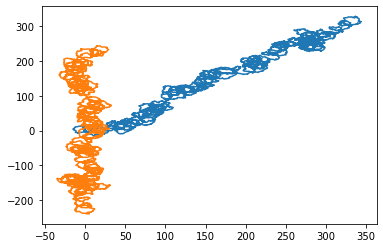

In [436]:
plt.plot(xs[:, 0], ys[:, 0])
plt.plot(xy_r[:, 0], xy_r[:, 1])

In [437]:
dxy_r = np.diff(xy_r, axis=0)

In [481]:
dist = np.linalg.norm(dxy_r, axis=1)

In [484]:
dxy_r.shape

(4999, 2)

In [439]:
thetas = np.arctan2(dxy_r[:,1], dxy_r[:,0])
thetas = np.diff(thetas, axis=0)
thetas[thetas > np.pi] = thetas[thetas > np.pi] - 2*np.pi
thetas[thetas < -np.pi] = thetas[thetas < -np.pi] + 2*np.pi

In [440]:
bins = np.linspace(-np.pi, np.pi, 61)
w = bins[1] - bins[0]
hist, _ = np.histogram(thetas, bins)
#hist, _ = np.histogram(thetas, bins, weights=dist)

<BarContainer object of 60 artists>

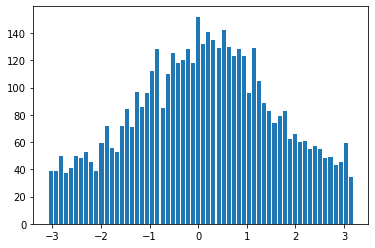

In [441]:
plt.bar(bins[1:], hist, width=0.8*w)

In [442]:
qis = np.arange(0.005, 1, 0.005)
qs = np.percentile(thetas, qis*100)
qsUni = uniform.ppf(qis, loc=-np.pi/2, scale=np.pi)

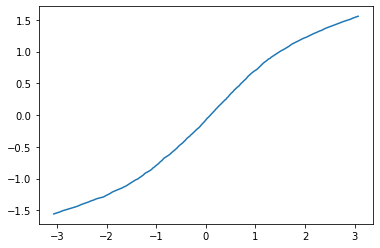

In [443]:
plt.plot(qs, qsUni)

In [444]:
r, _ = stats.pearsonr(qs, qsUni)

In [445]:
n = qis.shape[0]
std = np.std(thetas, ddof=1)
stdUni = uniform.std(loc=-np.pi, scale=2*np.pi)

In [446]:
np.sum((qs/std)**4/n) - np.sum((qsUni/stdUni)**4/n) 

2.146801450971321

In [387]:
n

199

In [486]:
steps, N = xs.shape
xy = np.concatenate((xs.reshape((steps,N,1)), ys.reshape((steps,N,1))), axis=2)
dxy = np.diff(xy, axis=0)

thetas = np.arctan2(dxy[:,:,1], dxy[:,:,0])
thetas = np.diff(thetas, axis=0)
thetas[thetas > np.pi] = thetas[thetas > np.pi] - 2*np.pi
thetas[thetas < -np.pi] = thetas[thetas < -np.pi] + 2*np.pi

#     qis = np.arange(0.005, 1, 0.005)
#     qs = np.percentile(thetas, qis*100, axis=0)
#     qsUni = uniform.ppf(qis, loc=-np.pi/2, scale=np.pi)
#     n = qis.shape[0]
#     std = np.std(thetas, ddof=1, axis=0)
#     stdUni = uniform.std(loc=-np.pi, scale=2*np.pi)

#return np.average(thetas, axis=0), np.std(thetas, ddof=1, axis=0), stats.skew(thetas, axis=0), stats.kurtosis(thetas, axis=0)

In [487]:
dxy.shape

(4999, 4, 2)

In [488]:
np.linalg.norm(dxy, axis=2).shape

(4999, 4)